In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import yaml
from sklearn.metrics import classification_report, confusion_matrix

# Load config
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

# Notebook directory and project root
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
root_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# Paths
preprocessed_path = os.path.join(root_dir, "data/processed/sample_preprocessed.csv")
models_dir = os.path.join(root_dir, "models")
results_dir = os.path.join(root_dir, "results")

target_col = config["data"]["target"]

# Load preprocessed data
df = pd.read_csv(preprocessed_path)
print("Dataset loaded:", df.shape)


Dataset loaded: (100000, 72)


In [3]:
baseline_model_path = os.path.join(models_dir, "baseline_model.pkl")
model = joblib.load(baseline_model_path)
print("Baseline model loaded successfully.")

Baseline model loaded successfully.


In [4]:
# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Drop non-numeric columns (matches training)
non_numeric_cols = X.select_dtypes(exclude=["number"]).columns
if len(non_numeric_cols) > 0:
    print(f"Dropping non-numeric columns: {list(non_numeric_cols)}")
    X = X.drop(columns=non_numeric_cols)

# Keep only features used during training
trained_features = model.feature_names_in_
X = X[trained_features]

# Convert target to numeric if needed
y = pd.Categorical(y).codes

print("Features prepared:", X.shape)

Dropping non-numeric columns: ['Source_File']
Features prepared: (100000, 70)


In [5]:
# Predictions
y_pred = model.predict(X)

# Confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

# Save metrics CSV
os.makedirs(results_dir, exist_ok=True)
report_df.to_csv(os.path.join(results_dir, "baseline_model_metrics.csv"), index=True)
print("✅ Metrics CSV saved:", os.path.join(results_dir, "baseline_model_metrics.csv"))


Confusion Matrix:
 [[83685     0     1     1     0     6     0     0     0    33     0     0
      0]
 [   74     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    6     0  4926     0     0     0     0     0     0     0     0     0
      0]
 [   40     0     0   359     0     0     0     0     0     0     0     0
      0]
 [   94     0     0     0  6470     0     0     0     0     0     0     0
      0]
 [   18     0     0     0     0   176     1     0     0     0     0     0
      0]
 [   17     0     0     0     0     0   198     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0   262     0     0     0     0
      0]
 [    1     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    5     0     0     0     3     0     0     0     0  3436     0     0
      0]
 [   10     0     0     0     0     0     0     0     0     0   108     0
      0]
 [   49     0     0     0     0     0     0     0     0     0     0 

C:\Users\bhand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\bhand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\bhand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

,precision,recall,f1-score,support
0,0.996037,0.999510,0.997770,83726.00000
1,0.000000,0.000000,0.000000,74.00000
2,0.999797,0.998783,0.999290,4932.00000
3,0.997222,0.899749,0.945982,399.00000
4,0.999537,0.985679,0.992560,6564.00000
5,0.967033,0.902564,0.933687,195.00000
6,0.994975,0.920930,0.956522,215.00000
7,1.000000,1.000000,1.000000,262.00000
8,0.000000,0.000000,0.000000,1.00000
9,0.990487,0.997677,0.994069,3444.00000


✅ Metrics CSV saved: C:\Users\bhand\ids-bias-project\results\baseline_model_metrics.csv


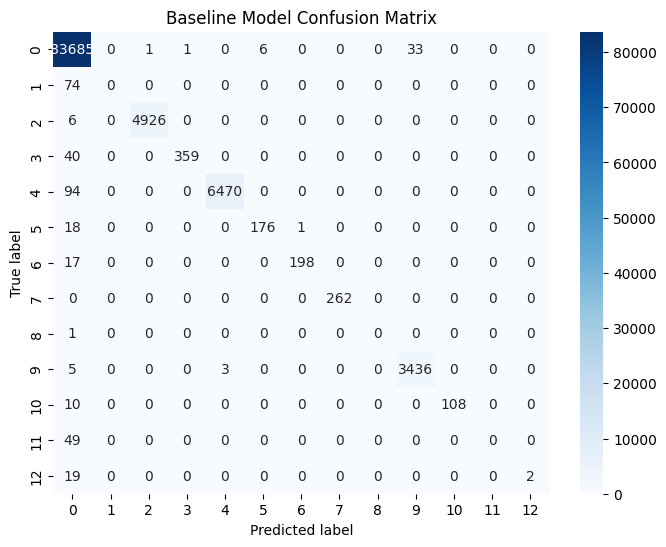

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Baseline Model Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()